Digite a função f(x, y): x**3-5
Digite x0 (valor inicial de x): 0
Digite y0 (condição inicial y(x0)): 3
Digite o valor final de x: 2
Digite os valores de passo h separados por vírgula (ex: 0.1,0.05,0.01): 1, 0.5, 3

Tentando resolver a EDO simbolicamente...
Solução geral obtida: Eq(y(x), C1 + x**4/4 - 5*x)
Solução particular com condição inicial: y(x) = x**4/4 - 5*x + 3.0

--- Simulação com passo h = 1.0 ---

Tabela de valores aproximados (Euler) - passo h = 1.0
 i |     x_i      |       y_i      
----------------------------------
 0 |   0.000000   |  3.0000000000  
 1 |   1.000000   |  -2.0000000000 
 2 |   2.000000   |  -6.0000000000 

Tabela comparativa: Euler - passo h = 1.0
 i |     x_i      |     y_exata     |     y_aprox     |  Erro absoluto 
---------------------------------------------------------------------------
 0 |   0.000000   |  3.0000000000   |  3.0000000000   |  0.0000000000  
 1 |   1.000000   |  -1.7500000000  |  -2.0000000000  |  0.2500000000  
 2 |   2.000000   |

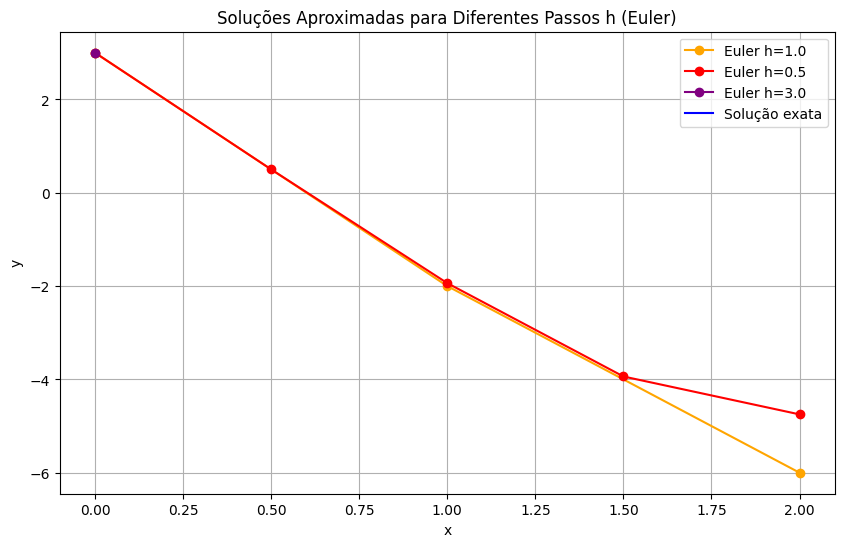

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def euler(f, x0, y0, h, xf):
    n = int((xf - x0) / h)
    xs = [x0]
    ys = [y0]
    x = x0
    y = y0
    for i in range(n):
        y = y + h * f(x, y)
        x = x + h
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

def exibir_tabela(xs, ys, metodo="Euler", h=None):
    titulo = f"Tabela de valores aproximados ({metodo})"
    if h is not None:
        titulo += f" - passo h = {h}"
    print("\n" + titulo)
    print(f"{'i':>2} | {'x_i':^12} | {'y_i':^15}")
    print("-" * 34)
    for i, (x_i, y_i) in enumerate(zip(xs, ys)):
        print(f"{i:>2} | {x_i:^12.6f} | {y_i:^15.10f}")

def exibir_tabela_comparativa(xs, ys, y_exata_func=None, metodo="Euler", h=None):
    if y_exata_func is None:
        print("\nTabela comparativa não disponível (solução exata não fornecida).")
        return

    titulo = f"Tabela comparativa: {metodo}"
    if h is not None:
        titulo += f" - passo h = {h}"
    print("\n" + titulo)
    print(f"{'i':>2} | {'x_i':^12} | {'y_exata':^15} | {'y_aprox':^15} | {'Erro absoluto':^15}")
    print("-" * 75)

    for i, x_i in enumerate(xs):
        y_aprox = ys[i]
        y_exata = y_exata_func(x_i)
        erro = abs(y_exata - y_aprox)
        print(f"{i:>2} | {x_i:^12.6f} | {y_exata:^15.10f} | {y_aprox:^15.10f} | {erro:^15.10f}")

def plotar_varios_passos(resultados, y_exata_func=None):
    plt.figure(figsize=(10, 6))
    cores = ['orange', 'red', 'purple', 'green', 'brown', 'cyan']
    for i, (h, (xs, ys)) in enumerate(resultados.items()):
        cor = cores[i % len(cores)]
        plt.plot(xs, ys, 'o-', label=f'Euler h={h}', color=cor)

    if y_exata_func is not None:
        x_dense = np.linspace(min(xs), max(xs), 300)
        y_exact = y_exata_func(x_dense)
        plt.plot(x_dense, y_exact, '-', label='Solução exata', color='blue')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Soluções Aproximadas para Diferentes Passos h (Euler)')
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    from sympy import symbols, sympify, lambdify, dsolve, Eq, Function

    expr = input("Digite a função f(x, y): ")
    expr = expr.replace('sen', 'sin').replace('ln', 'log').replace('e^', 'exp')

    x_sym, y_sym = symbols('x y')
    f_expr = sympify(expr)
    f = lambdify((x_sym, y_sym), f_expr, 'numpy')

    x0 = float(input("Digite x0 (valor inicial de x): "))
    y0 = float(input("Digite y0 (condição inicial y(x0)): "))
    xf = float(input("Digite o valor final de x: "))

    passos_str = input("Digite os valores de passo h separados por vírgula (ex: 0.1,0.05,0.01): ")
    passos = [float(h.strip()) for h in passos_str.split(',') if h.strip()]

    x = symbols('x')
    y = Function('y')
    ode = Eq(y(x).diff(x), f_expr)

    print("\nTentando resolver a EDO simbolicamente...")

    try:
        sol_geral = dsolve(ode, y(x))
        print(f"Solução geral obtida: {sol_geral}")

        C1 = symbols('C1')
        cond_eq = sol_geral.rhs.subs(x, x0) - y0
        from sympy import solve
        sol_const = solve(cond_eq, dict=True)

        if not sol_const:
            print("Não foi possível determinar a constante inicial. A solução exata não será usada.")
            y_exata_func = None
        else:
            c1_value = sol_const[0][C1]
            y_sol_def = sol_geral.rhs.subs(C1, c1_value)
            print(f"Solução particular com condição inicial: y(x) = {y_sol_def}")
            y_exata_func = lambdify(x, y_sol_def, 'numpy')

    except Exception as e:
        print("Não foi possível obter solução exata simbolicamente:", e)
        y_exata_func = None

    resultados = {}
    for h in passos:
        print(f"\n--- Simulação com passo h = {h} ---")
        xs, ys = euler(f, x0, y0, h, xf)
        exibir_tabela(xs, ys, metodo="Euler", h=h)
        exibir_tabela_comparativa(xs, ys, y_exata_func, metodo="Euler", h=h)
        resultados[h] = (xs, ys)

    plotar_varios_passos(resultados, y_exata_func)
